# Integración numérica revisitada



Supongamos que queremos aproximar la integral de cierta función. Para este ejemplo, nuevamente hagamos trampa y tomemos una función con integral conocida para poder conocer el error de manera explícita.

Un algoritmo muy intuitivo que vimos es el de utilizar sumas de Rieman para calcular la integral $\int_a^bf(x)\,dx$. Esto es, prefijado un $N$, consideramos 
$$
\sum_{n=1}^N \Delta\cdot f(a+n\Delta),\quad \mbox{siendo}\quad \Delta=\frac{b-a}{N}.
$$


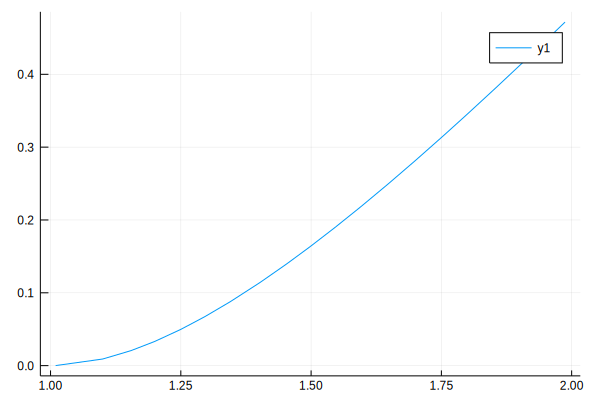

In [97]:
using Plots
f(x) = log(x)^2 

plot(f,1,2)

In [98]:
function intnum(N,a,b,f=f)
    I=0
    delta=(b-a)/N
    for i=0:N-1
        I+=delta*f(a+delta*i)
    end
    I
end
    

intnum (generic function with 4 methods)

In [105]:
res=2*(log(2)-1)^2

0.18831730559662163

In [100]:
intnum(10^4,1,2)-res

-2.402207307333759e-5

In [101]:
function intnumtrap(N,a,b,f=f)
    delta=(b-a)/N
    I=0
    for i=1:N-1
        I+=delta*f(a+delta*i)
    end
    I+delta/2*(f(a)+f(b))
end
    

intnumtrap (generic function with 2 methods)

In [102]:
intnumtrap(10^4,1,2)-res

5.776225608933316e-10

In [103]:
N=[10^i for i=1:6];

abs.(intnum.(N,1,2).-res)

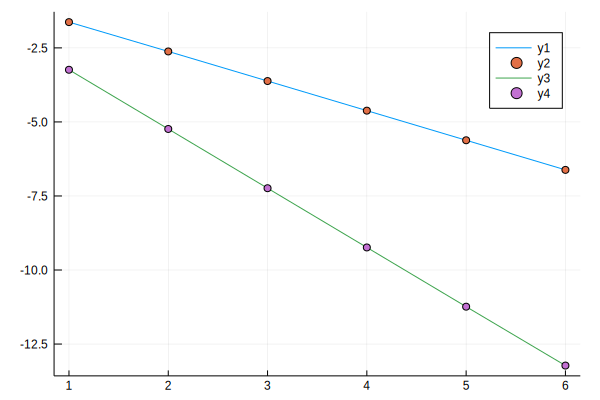

In [106]:
plot(log10.(N),log10.(abs.(intnum.(N,1,2, f).-res)))
scatter!(log10.(N),log10.(abs.(intnum.(N,1,2,f).-res)))
plot!(log10.(N),log10.(abs.(intnumtrap.(N,1,2,f).-res)))
scatter!(log10.(N),log10.(abs.(intnumtrap.(N,1,2,f).-res)))

Es claro que el método del trapecio es más rápido. Sin embargo el orden de velocida de convergencia parece similar. La pregunta natural es si podemos hacerlo mejor. Eso lo veremos más adelante.

In [107]:
f(x)=abs(x*(x-1/5)*(x-2/5)*(x-3/5)*(x-4/5)*(x-1))

f (generic function with 1 method)

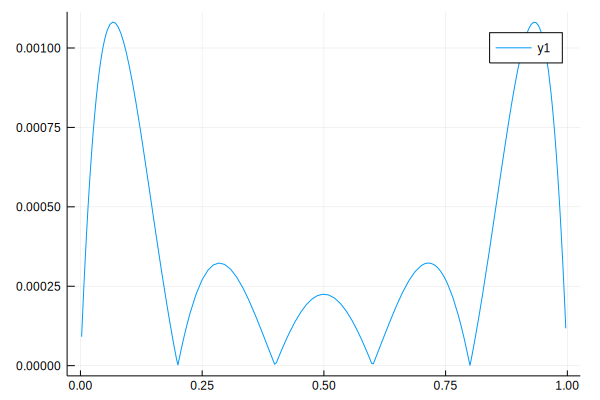

In [108]:
plot(f,0,1)

## Integrales impropias 
La idea principal es desingularizar de alguna manera la integral impropia.  Esta sección la miraremos desde un punto de vista más pragmático, sin realizar una teoría fina.

### I.I. de primera especie

Cuando estamos ante la presencia de una integral de la forma $\int_a^\infty f(x)\,dx$, un truco es hacer un cambio de variable que trasforme el intervalo $[a,\infty]$ en uno acotado. 
Hay muchas maneras de ver esto.
Por ejemplo podemos utilizar el cambio de variable 
$$
x=\frac{u}{u-1},\quad dx=\frac{du}{(1-u)^2}.$$
Luego resulta que una integral de la forma 
$$
\int_0^\infty f(x)\,dx=\int_0^1 f\left(\frac{u}{1-u}\right)\cdot \frac{du}{(1-u)^2}.
$$
De esta manera parece que se introduce una singularidad de orden 2 en $u=1$ sin embargo en muchos casos hay una desingularización dado que $f$ es integrable y debe tender a cero al manos más rápido que $1/x$.

### I.I. de segunda especie

El problema surge cuando tenemos integrales definidas en intervalos acotados pero que la función tiene un polo en algún punto del intervalo.
El truco es intentar descomponer la función en una impropia que se puede realizar la integración de manera analítica (exacta) y otra parte que sea una integral definida.
Por ejemplo, si queremos calcular la integral de una función 
$$
I=\int_0^1 \frac{e^{x^2}}{x^{1/2}}\,dx,
$$
podemos partirla en dos integrales
$$
I=\int_0^1 \frac{1}{x^{1/2}}\,dx +\int_0^1 \frac{e^{x^2}-1}{x^{1/2}}\,dx,
$$
La primera se resuelve a mano, y la segunda ya no tiene singularidad en $x=0$.

Otra posibilidad es hacer un cambio de variable elegante que rompa la singularidad. Basta ver en el ejemplo anterior que $u=\sqrt{x}$ realiza esto.

